/!\ Execution longue

# Tests de différents modèles de ML

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import random 
random.seed(42)

In [3]:
df = pd.read_csv('../data/Fraud.csv')
df = df.sample(n=200_000, random_state=42)

## Supervisé

In [4]:
from sklearn.model_selection import train_test_split
df = df.drop(['isFlaggedFraud','step', 'nameOrig', 'nameDest', "type"], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

In [5]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve

In [6]:
model = xgb.XGBClassifier(
    n_estimators=100, 
    max_depth=3, 
    random_state=42, 
    # enable_categorical=True, 
    # tree_method='gpu_hist', 
    # gpu_id=0, 
    verbosity=1
)

model.fit(df_train.drop('isFraud', axis=1), df_train['isFraud'])
y_pred_train = model.predict(df_train.drop('isFraud', axis=1))
y_pred_test = model.predict(df_test.drop('isFraud', axis=1))

print('Train accuracy:', accuracy_score(df_train['isFraud'], y_pred_train))
print('Test accuracy:', accuracy_score(df_test['isFraud'], y_pred_test))

print("Train AUC:", roc_auc_score(df_train['isFraud'], y_pred_train))
print("Test AUC:", roc_auc_score(df_test['isFraud'], y_pred_test))

Train accuracy: 0.9995714285714286
Test accuracy: 0.9995
Train AUC: 0.846763465009042
Test AUC: 0.8231623869695087


Accuracy très élevée 

In [7]:
from sklearn.neighbors import KNeighborsClassifier

df_train_knn = df_train.copy()
df_test_knn = df_test.copy()

model = KNeighborsClassifier(
    n_neighbors=2,
    weights='distance',
    algorithm='ball_tree',
    leaf_size=30,
    p = 2,
    metric = "minkowski", 
    n_jobs=-1,
)
model.fit(df_train_knn.drop('isFraud', axis=1), df_train_knn['isFraud'])
y_pred_train = model.predict(df_train_knn.drop('isFraud', axis=1))
y_pred_test = model.predict(df_test_knn.drop('isFraud', axis=1))
print('Train accuracy:', accuracy_score(df_train_knn['isFraud'], y_pred_train))
print('Test accuracy:', accuracy_score(df_test_knn['isFraud'], y_pred_test))
print("Train AUC:", roc_auc_score(df_train_knn['isFraud'], y_pred_train))
print("Test AUC:", roc_auc_score(df_test_knn['isFraud'], y_pred_test))

Train accuracy: 1.0
Test accuracy: 0.9989333333333333
Train AUC: 1.0
Test AUC: 0.8350570983596282


Accuracy très élevée

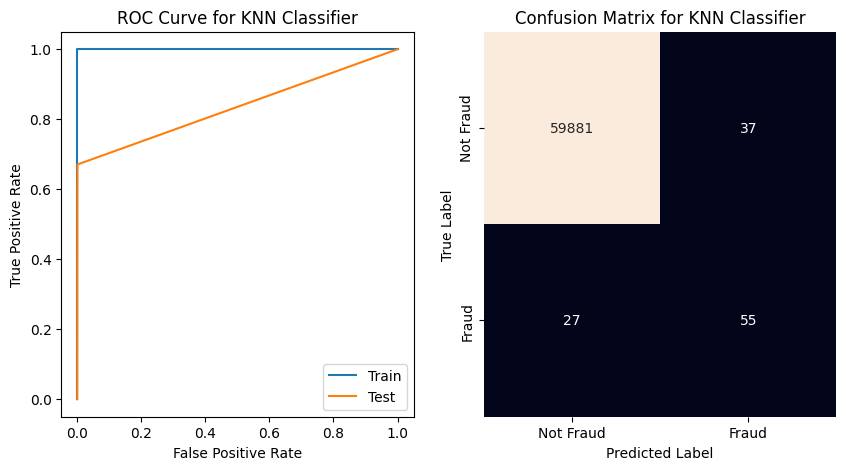

In [8]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
roc_train_x, roc_train_y,_ = roc_curve(df_train_knn['isFraud'], y_pred_train)
roc_test_x, roc_test_y,_ = roc_curve(df_test_knn['isFraud'], y_pred_test)
ax[0].plot(roc_train_x, roc_train_y, label='Train')
ax[0].plot(roc_test_x, roc_test_y, label='Test')
ax[0].set_title("ROC Curve for KNN Classifier")
ax[0].set_xlabel("False Positive Rate")
ax[0].set_ylabel("True Positive Rate")
ax[0].legend()

from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(df_test_knn['isFraud'], y_pred_test)
sns.heatmap(confusion_mat, annot=True, fmt='d', ax=ax[1], cbar=False)
ax[1].set_title("Confusion Matrix for KNN Classifier")
ax[1].set_xlabel("Predicted Label")
ax[1].set_ylabel("True Label")
ax[1].set_xticklabels(['Not Fraud', 'Fraud'])
ax[1].set_yticklabels(['Not Fraud', 'Fraud'])

plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier

df_train_rfc = df_train.copy()
df_test_rfc = df_test.copy()

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=42,
    n_jobs=-1,
)
model.fit(df_train_rfc.drop('isFraud', axis=1), df_train_rfc['isFraud'])
y_pred_train = model.predict(df_train_rfc.drop('isFraud', axis=1))
y_pred_test = model.predict(df_test_rfc.drop('isFraud', axis=1))
print('Train accuracy:', accuracy_score(df_train_rfc['isFraud'], y_pred_train))
print('Test accuracy:', accuracy_score(df_test_rfc['isFraud'], y_pred_test))
print("Train AUC:", roc_auc_score(df_train_rfc['isFraud'], y_pred_train))
print("Test AUC:", roc_auc_score(df_test_rfc['isFraud'], y_pred_test))

Train accuracy: 0.9987857142857143
Test accuracy: 0.9987666666666667
Train AUC: 0.543010752688172
Test AUC: 0.5487804878048781


Accuracy très élevée

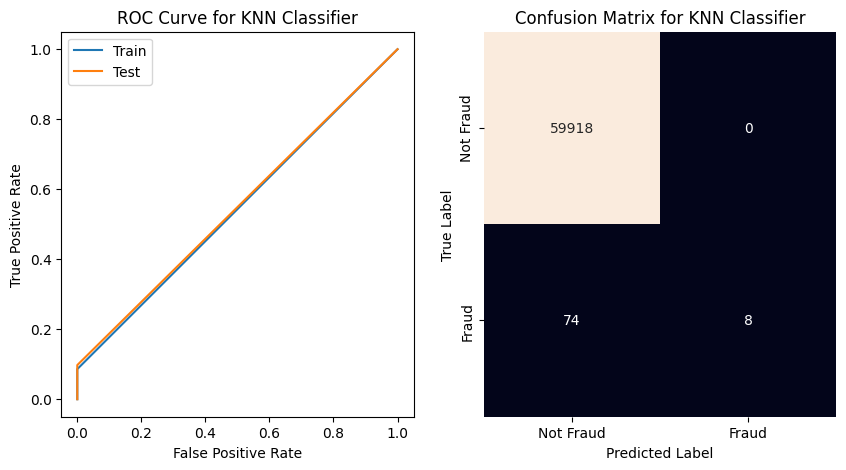

In [10]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
roc_train_x, roc_train_y,_ = roc_curve(df_train_rfc['isFraud'], y_pred_train)
roc_test_x, roc_test_y,_ = roc_curve(df_test_rfc['isFraud'], y_pred_test)
ax[0].plot(roc_train_x, roc_train_y, label='Train')
ax[0].plot(roc_test_x, roc_test_y, label='Test')
ax[0].set_title("ROC Curve for KNN Classifier")
ax[0].set_xlabel("False Positive Rate")
ax[0].set_ylabel("True Positive Rate")
ax[0].legend()

from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(df_test_knn['isFraud'], y_pred_test)
sns.heatmap(confusion_mat, annot=True, fmt='d', ax=ax[1], cbar=False)
ax[1].set_title("Confusion Matrix for KNN Classifier")
ax[1].set_xlabel("Predicted Label")
ax[1].set_ylabel("True Label")
ax[1].set_xticklabels(['Not Fraud', 'Fraud'])
ax[1].set_yticklabels(['Not Fraud', 'Fraud'])

plt.show()

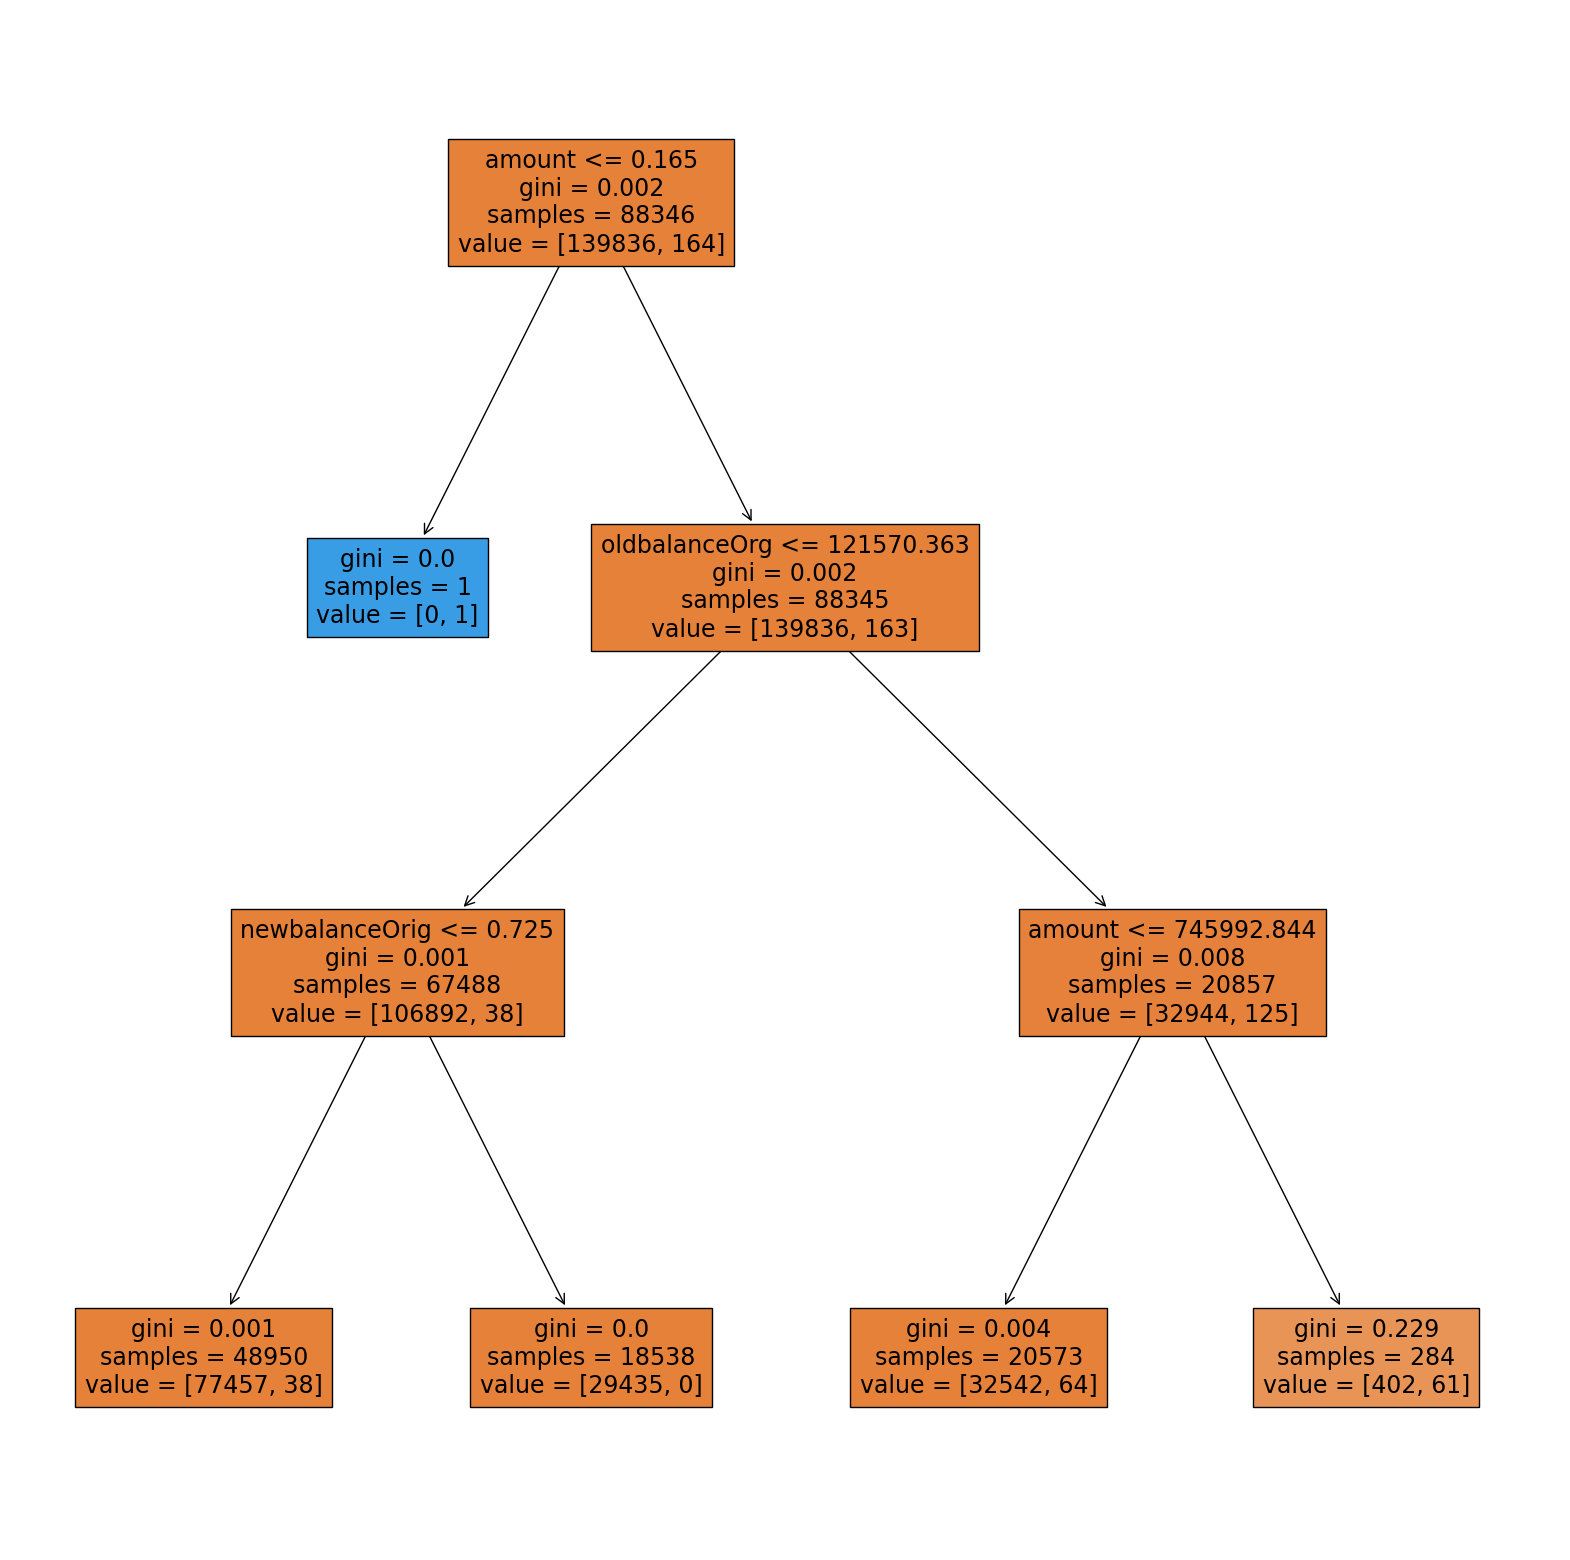

In [11]:
from sklearn.tree import plot_tree


plt.figure(figsize=(20, 20))
plot_tree(model.estimators_[0], feature_names=df_train_rfc.drop('isFraud', axis=1).columns, filled=True)
plt.show()